# Lab | Text Generation from Shakespeare's Sonnet

This notebook explores the fascinating domain of text generation using a deep learning model trained on Shakespeare's sonnets. 

The objective is to create a neural network capable of generating text sequences that mimic the style and language of Shakespeare.

By utilizing a Recurrent Neural Network (RNN) with Long Short-Term Memory (LSTM) layers, this project aims to demonstrate how a model can learn and replicate the complex patterns of early modern English. 

The dataset used consists of Shakespeare's sonnets, which are preprocessed and tokenized to serve as input for the model.

Throughout this notebook, you will see the steps taken to prepare the data, build and train the model, and evaluate its performance in generating text. 

This lab provides a hands-on approach to understanding the intricacies of natural language processing (NLP) and the potential of machine learning in creative text generation.

Let's import necessary libraries

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np

2024-10-04 13:57:41.936309: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-04 13:57:41.936385: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-04 13:57:41.971934: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-04 13:57:42.009850: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-04 13:57:44.368057: W tensorflow/compiler/tf2

Let's get the data!

In [3]:
import requests
url = 'https://raw.githubusercontent.com/martin-gorner/tensorflow-rnn-shakespeare/master/shakespeare/sonnets.txt'
resp = requests.get(url)
with open('sonnets.txt', 'wb') as f:
    f.write(resp.content)

data = open('sonnets.txt').read()

corpus = data.lower().split("\n")

Step 1: Initialise a tokenizer and fit it on the corpus variable using .fit_on_texts

In [4]:
# Your code here :
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)



Step 2: Calculate the Vocabulary Size

Let's figure out how many unique words are in your corpus. This will be the size of your vocabulary.

Calculate the length of tokenizer.word_index, add 1 to it and store it in a variable called total_words.

In [5]:
# Your code here :
total_words = len(tokenizer.word_index)+1

Create an empty list called input_sequences.

For each sentence in your corpus, convert the text into a sequence of integers using the tokenizer.
Then, generate n-gram sequences from these tokens.

Store the result in the list input_sequences.

In [6]:
# Convert each sentence into a sequence of integers
input_sequences = tokenizer.texts_to_sequences(corpus)

In [7]:
# Function to generate n-grams
def generate_n_grams(sequence, n=2):
    n_grams = []
    for i in range(1, len(sequence)+1):
        for j in range(len(sequence)-i+1):
            n_grams.append(sequence[j:j+i])
    return n_grams


In [8]:
# Your code here :
input_sequences_2 = []
for seq in input_sequences:
    n_grams = generate_n_grams(seq, n=3)  # You can set n=3 or any desired n
    input_sequences_2.extend(n_grams)

In [9]:
input_sequences = input_sequences_2
input_sequences

[[878],
 [3],
 [2],
 [313],
 [1375],
 [4],
 [3, 2],
 [2, 313],
 [313, 1375],
 [1375, 4],
 [3, 2, 313],
 [2, 313, 1375],
 [313, 1375, 4],
 [3, 2, 313, 1375],
 [2, 313, 1375, 4],
 [3, 2, 313, 1375, 4],
 [118],
 [1376],
 [878],
 [118, 1376],
 [1376, 878],
 [118, 1376, 878],
 [1377],
 [1378],
 [1379],
 [23],
 [1380],
 [1377, 1378],
 [1378, 1379],
 [1379, 23],
 [23, 1380],
 [1377, 1378, 1379],
 [1378, 1379, 23],
 [1379, 23, 1380],
 [1377, 1378, 1379, 23],
 [1378, 1379, 23, 1380],
 [1377, 1378, 1379, 23, 1380],
 [1],
 [8],
 [517],
 [1, 8],
 [8, 517],
 [1, 8, 517],
 [1381],
 [30],
 [1381, 30],
 [126],
 [186],
 [278],
 [635],
 [1382],
 [126, 186],
 [186, 278],
 [278, 635],
 [635, 1382],
 [126, 186, 278],
 [186, 278, 635],
 [278, 635, 1382],
 [126, 186, 278, 635],
 [186, 278, 635, 1382],
 [126, 186, 278, 635, 1382],
 [2],
 [98],
 [879],
 [2, 98],
 [98, 879],
 [2, 98, 879],
 [1383],
 [7],
 [1383, 7],
 [1384],
 [279],
 [1384, 279],
 [880],
 [880],
 [880, 880],
 [6],
 [34],
 [418],
 [881],
 [166],

Calculate the length of the longest sequence in input_sequences. Assign the result to a variable called max_sequence_len.

Now pad the sequences using pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre').
Convert it to a numpy array and assign the result back to our variable called input_sequences.

In [10]:
# Your code here :
max_sequence_len = max(len(seq) for seq in input_sequences)
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [11]:
input_sequences

array([[   0,    0,    0, ...,    0,    0,  878],
       [   0,    0,    0, ...,    0,    0,    3],
       [   0,    0,    0, ...,    0,    0,    2],
       ...,
       [   0,    0,    0, ...,  493, 3374,   14],
       [   0,    0,    0, ..., 3374,   14,   15],
       [   0,    0,    0, ..., 3374,   14,   15]], dtype=int32)

Prepare Predictors and Labels

Split the sequences into two parts:

- Predictors: All elements from input_sequences except the last one.
- Labels: The last element of each sequence in input_sequences.

In [12]:
X = []
y = []

for sequence in input_sequences:
    # Predictors are all elements except the last one
    X.append(sequence[:-1])
    
    # Label is the last element of the sequence
    y.append(sequence[-1])

# Convert X and y to numpy arrays for compatibility with Keras
X = np.array(X)
y = np.array(y)


One-Hot Encode the Labels :

Convert the labels (which are integers) into one-hot encoded vectors. 

Ensure the length of these vectors matches the total number of unique words in your vocabulary.

Use ku.to_categorical() on labels with num_classes = total_words

Assign the result back to our variable labels.

In [25]:
# Your code here :
y = ku.to_categorical(y,num_classes = total_words)

# Initialize the Model

Start by creating a Sequential model.

Add Layers to the Model:

Embedding Layer: The first layer is an embedding layer. It converts word indices into dense vectors of fixed size (100 in this case). Set the input length to the maximum sequence length minus one, which corresponds to the number of previous words the model will consider when predicting the next word.

Bidirectional LSTM Layer: Add a Bidirectional LSTM layer with 150 units. This layer allows the model to learn context from both directions (past and future) in the sequence. return_sequences=True

Dropout Layer: Add a dropout layer with a rate of 0.2 to prevent overfitting by randomly setting 20% of the input units to 0 during training.

LSTM Layer: Add a second LSTM layer with 100 units. This layer processes the sequence and passes its output to the next layer.

Dense Layer (Intermediate): Add a dense layer with half the total number of words as units, using ReLU activation. A regularization term (L2) is added to prevent overfitting.

Dense Layer (Output): The final dense layer has as many units as there are words in the vocabulary, with a softmax activation function to output a probability distribution over all words.

In [26]:

# Assuming you have the vocabulary size (total_words) and max_sequence_len already calculated
model = Sequential([

    # Embedding Layer
    Embedding(input_dim=total_words, output_dim=100, input_length=max_sequence_len-1),

    # Bidirectional LSTM Layer with 150 units
    Bidirectional(LSTM(150, return_sequences=True)),

    # Dropout Layer with 0.2 rate
    Dropout(0.2),

    # Second LSTM Layer with 100 units
    LSTM(100),

    # Dense Layer with half the total words, ReLU activation, and L2 regularization
    Dense(total_words // 2, activation='relu', kernel_regularizer=regularizers.l2(0.01)),

    # Output Layer with vocabulary size and softmax activation
    Dense(total_words, activation='softmax')
])


# Compile the Model:

Compile the model using categorical crossentropy as the loss function, the Adam optimizer for efficient training, and accuracy as the metric to evaluate during training.

In [27]:
# Your code here :
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print Model Summary:

Use model.summary() to print a summary of the model, which shows the layers, their output shapes, and the number of parameters.

In [28]:
# Your code here :
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10, 100)           337500    
                                                                 
 bidirectional_1 (Bidirecti  (None, 10, 300)           301200    
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 10, 300)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               160400    
                                                                 
 dense_2 (Dense)             (None, 1687)              170387    
                                                                 
 dense_3 (Dense)             (None, 3375)              5697000   
                                                      

# Now train the model for 50 epochs and assign it to a variable called history.

Training the model with 50 epochs should get you around 40% accuracy.

You can train the model for as many epochs as you like depending on the time and computing constraints you are facing. Ideally train it for a larger amount of epochs than 50.

That way you will get better text generation at the end.

However, dont waste your time.

In [29]:
X

array([[   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,  493,  493, 3374],
       [   0,    0,    0, ...,  493, 3374,   14],
       [   0,    0,    0, ...,  493, 3374,   14]], dtype=int32)

In [30]:
# Your code here:
# Your code
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50


2024-10-04 14:04:37.332462: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-10-04 14:04:38.853016: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f8e20006560 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-10-04 14:04:38.853081: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro P4000, Compute Capability 6.1
2024-10-04 14:04:38.900809: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1728050679.147117     287 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2061/2061 [==============================] - 49s 18ms/step - loss: 6.6212 - accuracy: 0.0223 - val_loss: 6.4254 - val_accuracy: 0.0289
Epoch 2/50
2061/2061 [==============================] - 26s 13ms/step - loss: 6.3157 - accuracy: 0.0312 - val_loss: 6.3035 - val_accuracy: 0.0315
Epoch 3/50
2061/2061 [==============================] - 26s 13ms/step - loss: 6.1514 - accuracy: 0.0374 - val_loss: 6.1543 - val_accuracy: 0.0409
Epoch 4/50
2061/2061 [==============================] - 25s 12ms/step - loss: 5.9286 - accuracy: 0.0472 - val_loss: 5.9769 - val_accuracy: 0.0531
Epoch 5/50
2061/2061 [==============================] - 25s 12ms/step - loss: 5.7307 - accuracy: 0.0583 - val_loss: 5.8765 - val_accuracy: 0.0587
Epoch 6/50
2061/2061 [==============================] - 25s 12ms/step - loss: 5.5618 - accuracy: 0.0694 - val_loss: 5.7530 - val_accuracy: 0.0666
Epoch 7/50
2061/2061 [==============================] - 24s 12ms/step - loss: 5.3919 - accuracy: 0.0823 - val_loss: 5.6626 - val_accura

# Use plt from matplotlib to plot the training accuracy over epochs and the loss over epochs

First you will have to get the accuracy and loss data over epochs, you can do this by using methods on your model.

In [31]:
# Your code here :
# Get accuracy and loss from the training history
training_accuracy = history.history['accuracy']
training_loss = history.history['loss']
validation_accuracy = history.history['val_accuracy']
validation_loss = history.history['val_loss']

# Print out accuracy and loss for training and validation data
print("Training Accuracy over Epochs:", training_accuracy)
print("Training Loss over Epochs:", training_loss)
print("Validation Accuracy over Epochs:", validation_accuracy)
print("Validation Loss over Epochs:", validation_loss)


Training Accuracy over Epochs: [0.022349586710333824, 0.03118935041129589, 0.037375666201114655, 0.047185830771923065, 0.058269649744033813, 0.0694444477558136, 0.08234776556491852, 0.09937530010938644, 0.11992055177688599, 0.14131489396095276, 0.1674702763557434, 0.19632460176944733, 0.22705906629562378, 0.25410905480384827, 0.27947598695755005, 0.30393317341804504, 0.32522135972976685, 0.34610018134117126, 0.3643558919429779, 0.381186306476593, 0.39562106132507324, 0.4092370271682739, 0.4214276969432831, 0.4339974522590637, 0.4439137578010559, 0.45339033007621765, 0.46094128489494324, 0.4685528874397278, 0.47593703866004944, 0.4819262623786926, 0.48773351311683655, 0.494814395904541, 0.4994693100452423, 0.5024411678314209, 0.5081270933151245, 0.5126000642776489, 0.5152080059051514, 0.5190289616584778, 0.5242297649383545, 0.5246846079826355, 0.5291272401809692, 0.5297792553901672, 0.5339337587356567, 0.5368298292160034, 0.539210319519043, 0.5413482785224915, 0.5422731637954712, 0.5453

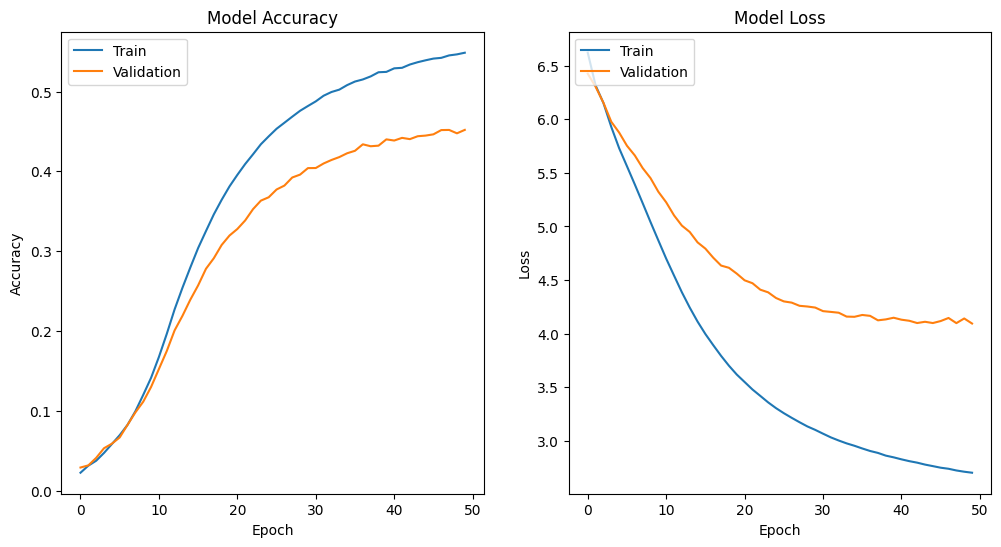

In [32]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Generate text with the model based on a seed text

Now you will create two variables :

- seed_text = 'Write the text you want the model to use as a starting point to generate the next words'
- next_words = number_of_words_you_want_the_model_to_generate

Please change number_of_words_you_want_the_model_to_generate by an actual integer.

In [36]:
# Your code here :
# Seed text (starting point for text generation)
seed_text = "Like pebbles on the shore"

# Number of words you want the model to generate
next_words = 50  # Replace this with the actual number of words you want the model to generate

# Print the seed and number of words to generate
print(f"Seed Text: {seed_text}")
print(f"Next Words to Generate: {next_words}")

Seed Text: Like pebbles on the shore
Next Words to Generate: 50


Now create a loop that runs based on the next_words variable and generates new text based on your seed_text input string. Print the full text with the generated text at the end.

This time you dont get detailed instructions.

Have fun!

In [40]:
def generate_text(seed_text, next_words, model, tokenizer, max_sequence_len):
    """
    Generate text based on seed text using a trained model and tokenizer.

    Parameters:
    - seed_text: The initial string to start generating from
    - next_words: The number of words to generate
    - model: The trained Keras model to use for predictions
    - tokenizer: The tokenizer used to encode the input sequences
    - max_sequence_len: The maximum sequence length the model was trained on

    Returns:
    - The generated text appended to the seed_text
    """
    for _ in range(next_words):
        # Convert the seed text into sequences of integers
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        
        # Pad the sequence to the maximum sequence length
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        
        # Predict the next word
        predicted = model.predict(token_list, verbose=0)
        
        # Get the index of the word with the highest probability
        predicted_word_index = np.argmax(predicted, axis=-1)[0]
        
        # Find the word that corresponds to this index
        for word, index in tokenizer.word_index.items():
            if index == predicted_word_index:
                next_word = word
                break
        
        # Append the predicted word to the seed text
        seed_text += " " + next_word

    # Return the final generated text
    return seed_text

# Example usage
final_text = generate_text(seed_text="Write the text you want", next_words=50, 
                           model=model, tokenizer=tokenizer, max_sequence_len=max_sequence_len)

print("Generated Text: ", final_text)



Generated Text:  Write the text you want if but yet thou mightest my might unused allow shorn away is thee and spacious what they from thee well in thee be it new praise so clear account to muse no more wish'd more well stol'n it is thee that i have scanted all too use earth disgrace me


Experiment with at least 3 different seed_text strings and see what happens!

In [42]:
# Your code here :
input_statement = ['let me compare you to a summers day', 'like pebbels on a shore', 'Thy love is']
for input in input_statement:
    final_text = generate_text(seed_text=input, next_words=50, 
                           model=model, tokenizer=tokenizer, max_sequence_len=max_sequence_len)

    print("Generated Text: ", final_text)

Generated Text:  let me compare you to a summers day of youth in thee back so is the weary travel's end wealth so shows now unto the beauty might know his sweetest store more best alone are tell my mind when body's deaths be hide my breast new skill and more age and me have leaves of you were yet
Generated Text:  like pebbels on a shore where two lovest you from my moan the voice of sluttish time doth ill that my desire love death of love this too fair were remember be store more shall know thy mind thee more and bright in heaven's sun staineth light i loved to dwell in lover's eyes from
Generated Text:  Thy love is strengthen'd though more weak in seeming one desire you hold her more to please thee behold misprision growing age lie and my mind that face of truth in beauty dyed thou shouldst lovest thee in my breast where more dear friend and for that worth in you doth black need
